# LOAN STATUS PREDICTION IN PEER TO PEER LENDING DATA

## Introduction

This data was obtained from loan data in peer to peer lending company headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. 

Solving this case study will give us an idea about how real business problems are solved using EDA and Machine Learning. In this case study, we will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to custo 

## Business Understanding

When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for takin actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

When a person applies for a loan, there are two types of decisions that could be taken by the company:
1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## OBJECTIVE

The objective of this project is to identify the risky applicants  is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who defaultcause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

## Dataset Description

| COLUMNS | DESCRIPTION | 
| --- | --- |
| Loan Amount | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.|
| term | The number of payments on the loan. Values are in months and can be either 36 or 60.|
| int_rate | Interest Rate on the loan.|
| installment | The monthly payment owed by the borrower if the loan originates.|
| grade | LC assigned loan grade.|
| sub_grade | LC assigned loan subgrade.|
| emp_title | The job title supplied by the Borrower when applying for the loan.|
| emp_length | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.|
| home_ownership | The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER.|
| annual_inc | The self-reported annual income provided by the borrower during registration.|
| verification_status | Indicates if income was verified by LC, not verified, or if the income source was verified.|
| issue_d | The month which the loan was funded.|
| loan_status | Current status of the loan.|
| purpose | A category provided by the borrower for the loan request.|
| title | The loan title provided by the borrower.|
| zip_code | The first 3 numbers of the zip code provided by the borrower in the loan application.|
| addr_state | The state provided by the borrower in the loan application.|
| dti | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.|
| earliest_cr_line | The month the borrower's earliest reported credit line was opened.|
| open_acc | The number of open credit lines in the borrower's credit file.|
| pub_rec | Number of derogatory public records.|
| revol_bal | Total credit revolving balance.|
| revol_util | Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.|
| total_acc | The total number of credit lines currently in the borrower's credit file.|
| initial_list_status |The initial listing status of the loan. Possible values are – W, F.|
| application_type |Indicates whether the loan is an individual application or a joint application with two co-borrowers|
|mort_acc |Number of mortgage accounts.|
|pub_rec_bankruptcies | Number of public record bankruptcies.|

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Asus\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn import tree

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import pickle
import joblib

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns

In [5]:
pip install scikit-learn==0.23.2

  Using cached scikit_learn-0.23.2-cp37-cp37m-win_amd64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


ERROR: imbalanced-learn 0.8.1 has requirement scikit-learn>=0.24, but you'll have scikit-learn 0.23.2 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\asus\\anaconda3\\lib\\site-packages\\sklearn\\~libs\\vcomp140.dll'
Consider using the `--user` option or check the permissions.



In [6]:
conda list scikit-learn

# packages in environment at C:\Users\Asus\anaconda3:
#
# Name                    Version                   Build  Channel
scikit-learn              0.23.2                   pypi_0    pypi

Note: you may need to restart the kernel to use updated packages.


## Data Loading

In [57]:
data = pd.read_csv (r'C:\Users\Asus\Desktop\Investree Data.csv')

### Dataset Exploration

In [3]:
df_data = data

In [4]:
df_data.head ()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


From the result above, we can see that most of the columns contain numerical data. To know this, we have to check on the unique value each of these categorical data has.

In [5]:
print (df_data.shape)
df_data.info ()

(396030, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  

This dataset contains 396030 rows and 27 columns. Out of 27, there is a column called "Loan Status" that will be the target variable, while the rest of 26 columns are the predictors and a unique identifier.

In [6]:
df_data.describe ().T 

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.00,14113.89,8357.44,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.00,13.64,4.47,5.32,10.49,13.33,16.49,30.99
installment,396030.00,431.85,250.73,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.00,74203.18,61637.62,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.00,17.38,18.02,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.00,11.31,5.14,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.00,0.18,0.53,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.00,15844.54,20591.84,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.00,53.79,24.45,0.00,35.80,54.80,72.90,892.30
total_acc,396030.00,25.41,11.89,2.00,17.00,24.00,32.00,151.00


Some of the coloumns are skewed that it can be seen ny the value of mean and median that is very far. The range of the numerical columns are varied.

In [7]:
df_data.select_dtypes (object).describe ().T

,count,unique,top,freq
term,396030,2,36 months,302005
grade,396030,7,B,116018
sub_grade,396030,35,B3,26655
emp_title,373103,173105,Teacher,4389
emp_length,377729,11,10+ years,126041
home_ownership,396030,6,MORTGAGE,198348
verification_status,396030,3,Verified,139563
issue_d,396030,115,Oct-2014,14846
loan_status,396030,2,Fully Paid,318357
purpose,396030,14,debt_consolidation,234507


Some of the categorical features are varied stand from low to medium cardinality. low cardinality ranging from 2 to 5 while normal cardinality around > 5)



## Data Cleaning

The goals of this data cleaning are:
1. Remove or fill any missing data
2. Remove unnecessary or repetitive features.
3. Convert categorical string features to dummy variables. 

In [8]:
df_data.isnull().any()

loan_amnt               False
term                    False
int_rate                False
installment             False
grade                   False
sub_grade               False
emp_title                True
emp_length               True
home_ownership          False
annual_inc              False
verification_status     False
issue_d                 False
loan_status             False
purpose                 False
title                    True
dti                     False
earliest_cr_line        False
open_acc                False
pub_rec                 False
revol_bal               False
revol_util               True
total_acc               False
initial_list_status     False
application_type        False
mort_acc                 True
pub_rec_bankruptcies     True
address                 False
dtype: bool

In [9]:
# The length of the data
print(f"The Length of the data: {data.shape}")

The Length of the data: (396030, 27)


In [10]:
# Missing values
for column in data.columns:
    if data[column].isna().sum() != 0:
        missing = data[column].isna().sum()
        portion = (missing / data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'emp_title': number of missing values '22927' ==> '5.789%'
'emp_length': number of missing values '18301' ==> '4.621%'
'title': number of missing values '1755' ==> '0.443%'
'revol_util': number of missing values '276' ==> '0.070%'
'mort_acc': number of missing values '37795' ==> '9.543%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


#### Emp_title

In [11]:
df_data.emp_title.nunique()

173105

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [12]:
df_data.drop('emp_title', axis=1, inplace=True)

In [13]:
df_data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [14]:
for year in df_data.emp_length.unique():
    print(f"{year} years in this position:")
    print(f"{df_data[df_data.emp_length == year].loan_status.value_counts(normalize=True)}")
    print('==========================================')

10+ years years in this position:
Fully Paid    0.82
Charged Off   0.18
Name: loan_status, dtype: float64
4 years years in this position:
Fully Paid    0.81
Charged Off   0.19
Name: loan_status, dtype: float64
< 1 year years in this position:
Fully Paid    0.79
Charged Off   0.21
Name: loan_status, dtype: float64
6 years years in this position:
Fully Paid    0.81
Charged Off   0.19
Name: loan_status, dtype: float64
9 years years in this position:
Fully Paid    0.80
Charged Off   0.20
Name: loan_status, dtype: float64
2 years years in this position:
Fully Paid    0.81
Charged Off   0.19
Name: loan_status, dtype: float64
3 years years in this position:
Fully Paid    0.80
Charged Off   0.20
Name: loan_status, dtype: float64
8 years years in this position:
Fully Paid    0.80
Charged Off   0.20
Name: loan_status, dtype: float64
7 years years in this position:
Fully Paid    0.81
Charged Off   0.19
Name: loan_status, dtype: float64
5 years years in this position:
Fully Paid    0.81
Charged Of


Charge off rates are extremely similar across all employment lengths. So we are going to drop the emp_length column.

In [15]:
df_data.drop('emp_length', axis=1, inplace=True)

#### Title

In [16]:
df_data.title.value_counts().head()

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Name: title, dtype: int64

In [17]:
df_data.purpose.value_counts().head()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: purpose, dtype: int64

The title column is simply a string subcategory/description of the purpose column. So we are going to drop the title column.

In [18]:

df_data.drop('title', axis=1, inplace=True)

#### Mort_acc

There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach!

Let's review the other columsn to see which most highly correlates to mort_acc

In [19]:
df_data.mort_acc.value_counts()

0.00     139777
1.00      60416
2.00      49948
3.00      38049
4.00      27887
5.00      18194
6.00      11069
7.00       6052
8.00       3121
9.00       1656
10.00       865
11.00       479
12.00       264
13.00       146
14.00       107
15.00        61
16.00        37
17.00        22
18.00        18
19.00        15
20.00        13
24.00        10
22.00         7
21.00         4
25.00         4
27.00         3
32.00         2
31.00         2
23.00         2
26.00         2
28.00         1
30.00         1
34.00         1
Name: mort_acc, dtype: int64

In [20]:
df_data.mort_acc.isna().sum()

37795

In [21]:
mort_acc_plot = pd.DataFrame (df_data.corr()['mort_acc'].drop('mort_acc').sort_values())
mort_acc_plot

,mort_acc
int_rate,-0.08
dti,-0.03
revol_util,0.01
pub_rec,0.01
pub_rec_bankruptcies,0.03
open_acc,0.11
installment,0.19
revol_bal,0.19
loan_amnt,0.22
annual_inc,0.24


In [22]:
mort_acc_plot = {'Variabel': ['int_rate', 'dti','revol_util', 'pub_rec', 'pub_rec_bankruptcies', 'open_acc', 'installment', 'revol_bal', 'loan_amnt', 'annual_inc', 'total_acc'], 'mort_acc': [-0.08, -0.03,0.01,0.01,0.03,0.11,0.19,0.19,0.22,0.24,0.38]}  
mort_acc_plot = pd.DataFrame(mort_acc_plot) 
mort_acc_plot

,Variabel,mort_acc
0,int_rate,-0.08
1,dti,-0.03
2,revol_util,0.01
3,pub_rec,0.01
4,pub_rec_bankruptcies,0.03
5,open_acc,0.11
6,installment,0.19
7,revol_bal,0.19
8,loan_amnt,0.22
9,annual_inc,0.24


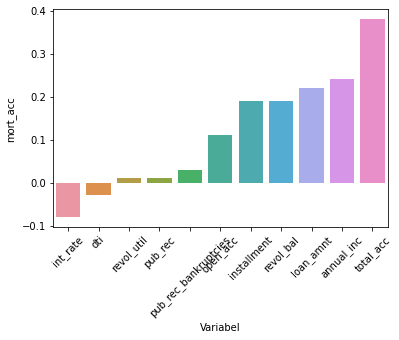

In [23]:
sns.barplot (data = mort_acc_plot, x='Variabel', y='mort_acc')
plt.xticks(rotation=45)
plt.show ()

Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:

In [24]:
total_acc_avg = df_data.groupby(by='total_acc').mean().mort_acc

In [25]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc
    

In [26]:
df_data['mort_acc'] = df_data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [27]:
df_data.head (3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


#### Revo_util & public_rec_bankrupticies

In [28]:
df_data['mort_acc'] = df_data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [29]:
for column in data.columns:
    if df_data[column].isna().sum() != 0:
        missing = df_data[column].isna().sum()
        portion = (missing / df_data.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

'revol_util': number of missing values '276' ==> '0.070%'
'pub_rec_bankruptcies': number of missing values '535' ==> '0.135%'


In [30]:
df_data.dropna(inplace=True)

In [31]:
df_data.shape

(395219, 24)

In [32]:
df_data.head (2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


### Duplicates Values

Checking for the duplicate value. if any duplicate value, hence we have to remove duplicate value from dataset

In [33]:
df_data.duplicated().any()

False

The dataset doesn't contain any duplicate rows, especially the unique identifier "customerID". This means, that each row represents a unique customer with their different characteristics and churn tendency.

In [34]:
df_data.to_csv('loan_data.csv', index = False)
df_data.to_csv (r'C:\Users\Asus\Desktop\loan_data.csv')

In [35]:
df_data.head ()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [36]:
df_data.to_excel('loan_data.xlsx', index = False)
df_data.to_excel (r'C:\Users\Asus\Desktop\loan_data.xlsx')

In [37]:
df_data.head ()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.00,36 months,11.44,329.48,B,B4,RENT,117000.00,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.00,36 months,11.99,265.68,B,B5,MORTGAGE,65000.00,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.00,36 months,10.49,506.97,B,B3,RENT,43057.00,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.00,36 months,6.49,220.65,A,A2,RENT,54000.00,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.00,60 months,17.27,609.33,C,C5,MORTGAGE,55000.00,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650"


In [47]:
df_data['issue_d'] = pd.to_datetime(df_data['issue_d'])

In [48]:
df_data['issue_d'] = df_data['issue_d'].dt.strftime('%Y-%m')

In [51]:
df_data['Datetime'] = pd.to_datetime(df_data['issue_d'])

In [52]:
df_data['Datetime'] = df_data['Datetime'].dt.strftime('%Y')

In [53]:
df_data.head ()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,Datetime
0,10000.00,36 months,11.44,329.48,B,B4,RENT,117000.00,Not Verified,2015-01,Fully Paid,vacation,26.24,Jun-1990,16.00,0.00,36369.00,41.80,25.00,w,INDIVIDUAL,0.00,0.00,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",2015
1,8000.00,36 months,11.99,265.68,B,B5,MORTGAGE,65000.00,Not Verified,2015-01,Fully Paid,debt_consolidation,22.05,Jul-2004,17.00,0.00,20131.00,53.30,27.00,f,INDIVIDUAL,3.00,0.00,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",2015
2,15600.00,36 months,10.49,506.97,B,B3,RENT,43057.00,Source Verified,2015-01,Fully Paid,credit_card,12.79,Aug-2007,13.00,0.00,11987.00,92.20,26.00,f,INDIVIDUAL,0.00,0.00,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",2015
3,7200.00,36 months,6.49,220.65,A,A2,RENT,54000.00,Not Verified,2014-11,Fully Paid,credit_card,2.60,Sep-2006,6.00,0.00,5472.00,21.50,13.00,f,INDIVIDUAL,0.00,0.00,"823 Reid Ford\r\nDelacruzside, MA 00813",2014
4,24375.00,60 months,17.27,609.33,C,C5,MORTGAGE,55000.00,Verified,2013-04,Charged Off,credit_card,33.95,Mar-1999,13.00,0.00,24584.00,69.80,43.00,f,INDIVIDUAL,1.00,0.00,"679 Luna Roads\r\nGreggshire, VA 11650",2013


In [54]:
df_data.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   home_ownership        395219 non-null  object 
 7   annual_inc            395219 non-null  float64
 8   verification_status   395219 non-null  object 
 9   issue_d               395219 non-null  object 
 10  loan_status           395219 non-null  object 
 11  purpose               395219 non-null  object 
 12  dti                   395219 non-null  float64
 13  earliest_cr_line      395219 non-null  object 
 14  open_acc              395219 non-null  float64
 15  

In [55]:
df_data.to_csv('loan_data_3.csv', index = False)
df_data.to_csv (r'C:\Users\Asus\Desktop\loan_data_3.csv')

In [56]:
df_data.to_excel('loan_data_4.xlsx', index = False)
df_data.to_excel (r'C:\Users\Asus\Desktop\loan_data_4.xlsx')

## Data Exploration

### Numerical Feature

In [42]:
num_cols = df_data.select_dtypes("number").columns.tolist()
print(f"Cols: {num_cols}\nLen: {len(num_cols)}")

Cols: ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']
Len: 12


### Univariate

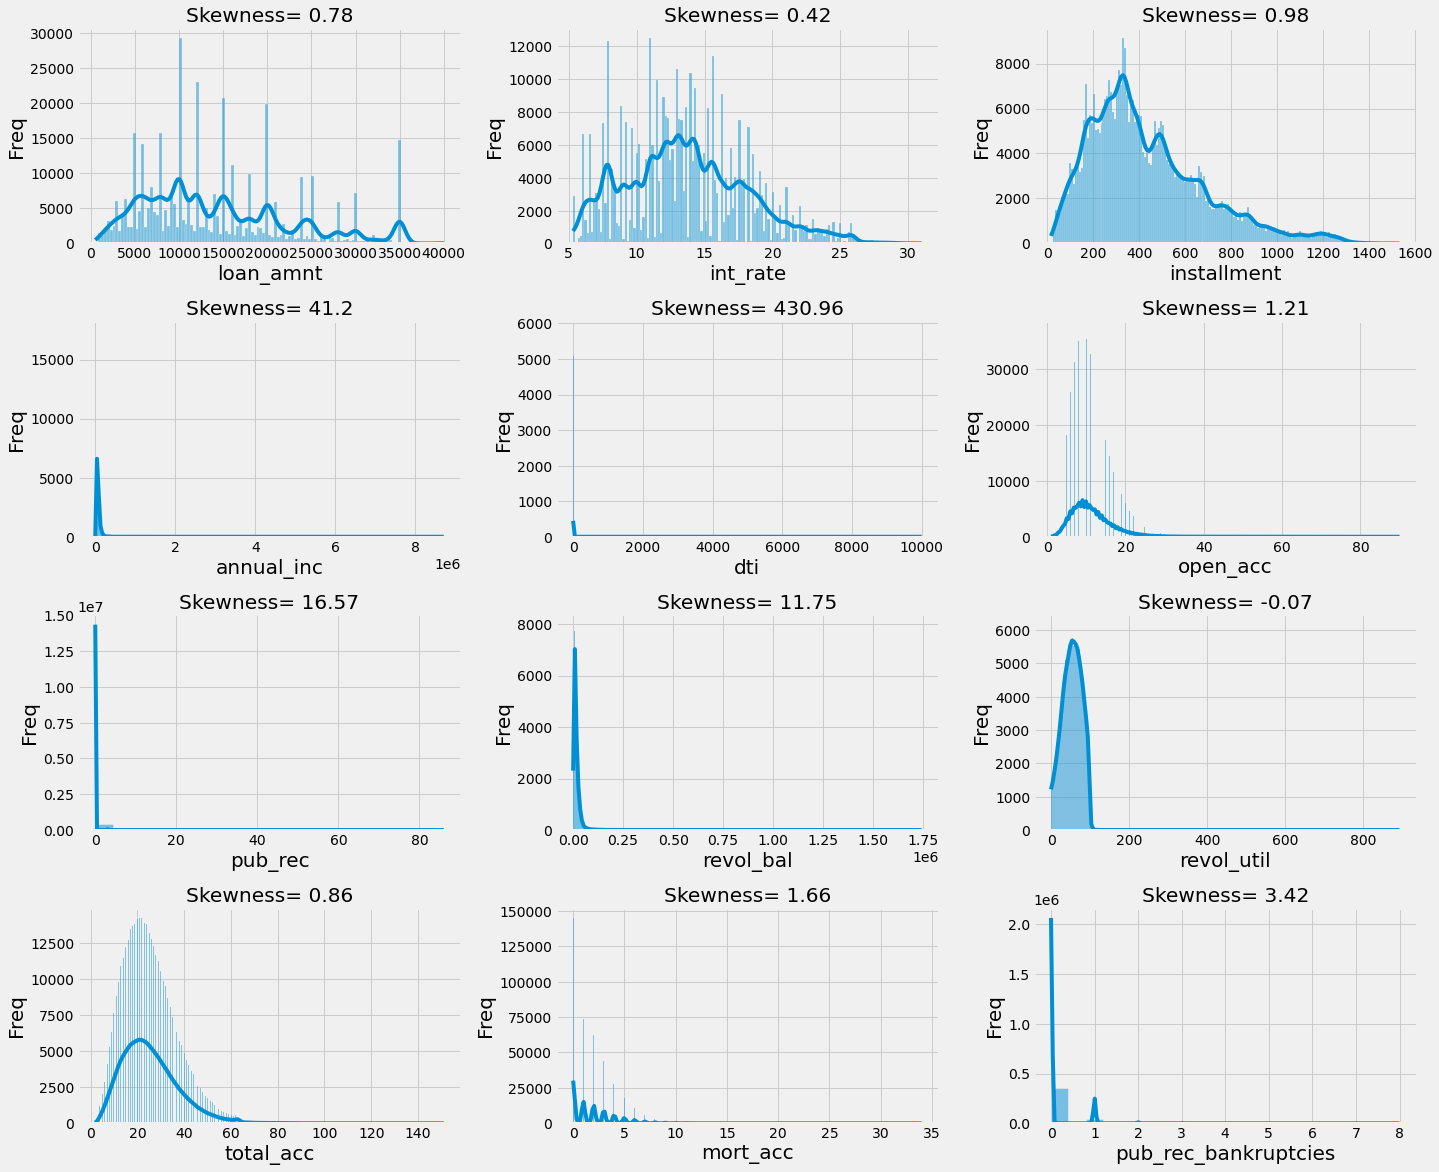

In [43]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.histplot(
        df_data[num_cols[i]],
        kde = True
    )
    ax.set_xlabel(num_cols[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.set_title(f"Skewness= {str(round(df_data[num_cols[i]].skew(),2))}")
plt.tight_layout()
plt.show()

Based on the histogram above, we can see the frequency of occurrence of each bin of values. All of them are positively skewed. The skewness means the column has outliers, to make the model more robust in the future, we need to treat the outliers. Thus, we will do outliers treatment on the preprocessing step as part of the feature engineering.

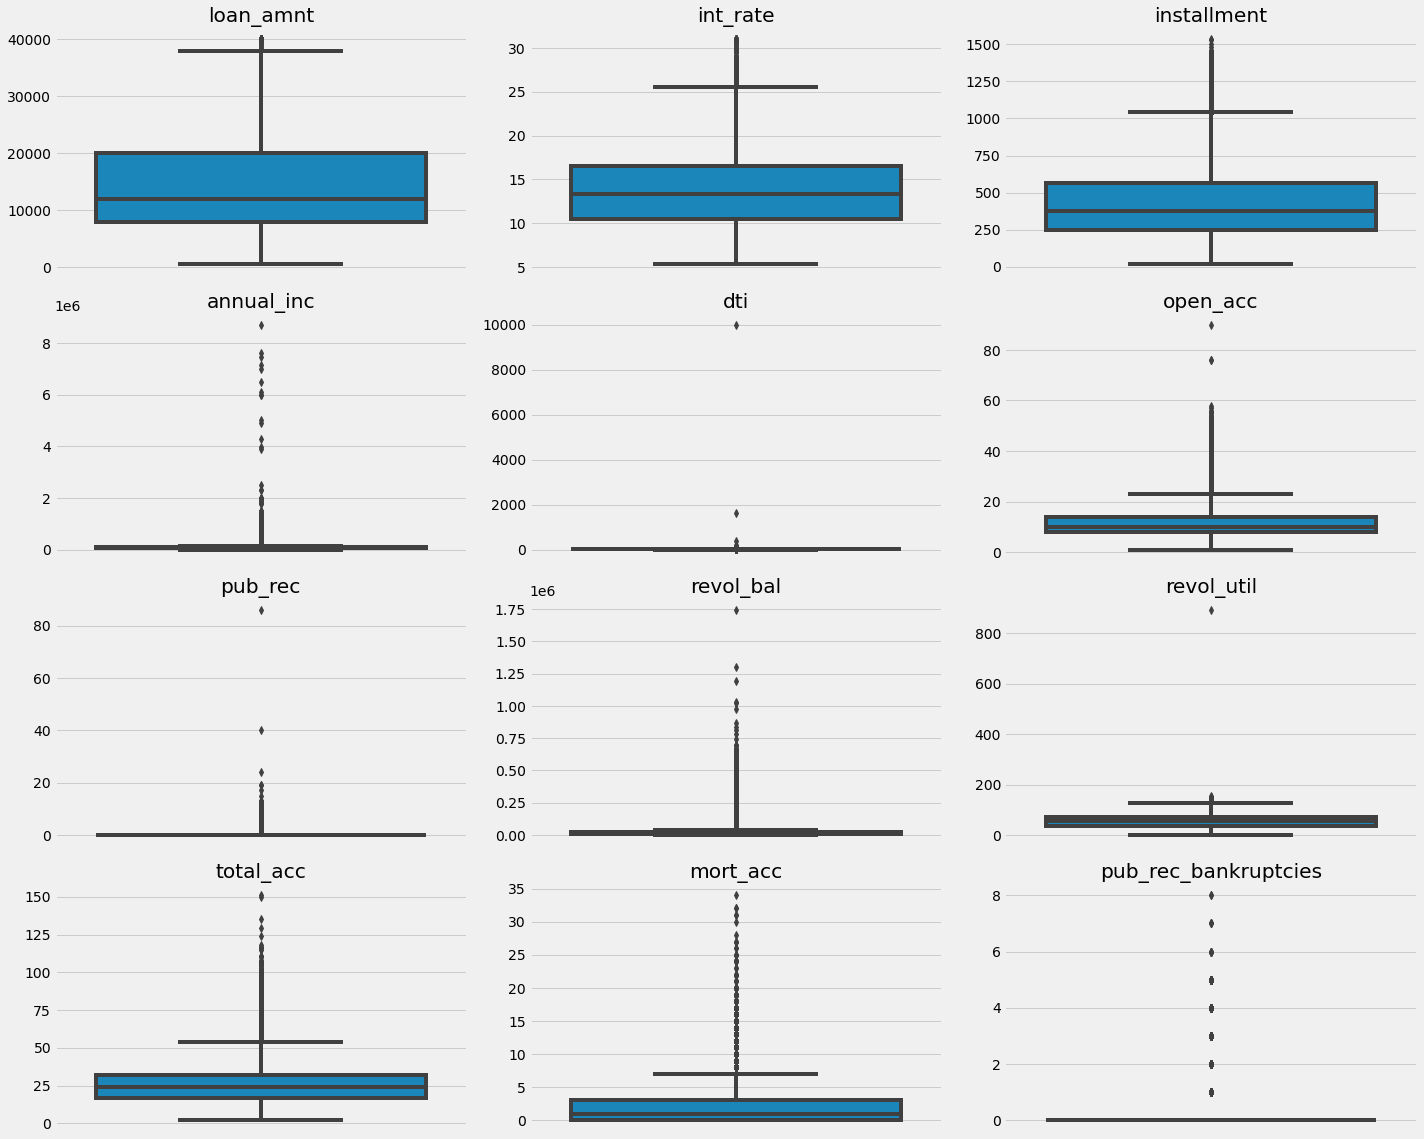

In [44]:
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.boxplot(
        y = df_data[num_cols[i]]
    )
    ax.set_ylabel('')
    ax.set_title(num_cols[i])
plt.tight_layout()
plt.show()

Using a boxplot, we can see the outliers more clear than the histogram. This will be beneficial in evaluating after outlier treatments.

pub_rec_bankruptcies doesn't contain that many outliers, most of the value is around 0.0

### Bivariate

Checking the distribution of the numerical feature with its target variable.

Those who ended up loan status are fully paid class = 1, are in green. Those who didn't end up filly paid represented by the color gray.

In [45]:
palette = {"Fully Paid" : '#228B22', "Charged Off" : '#808080'}

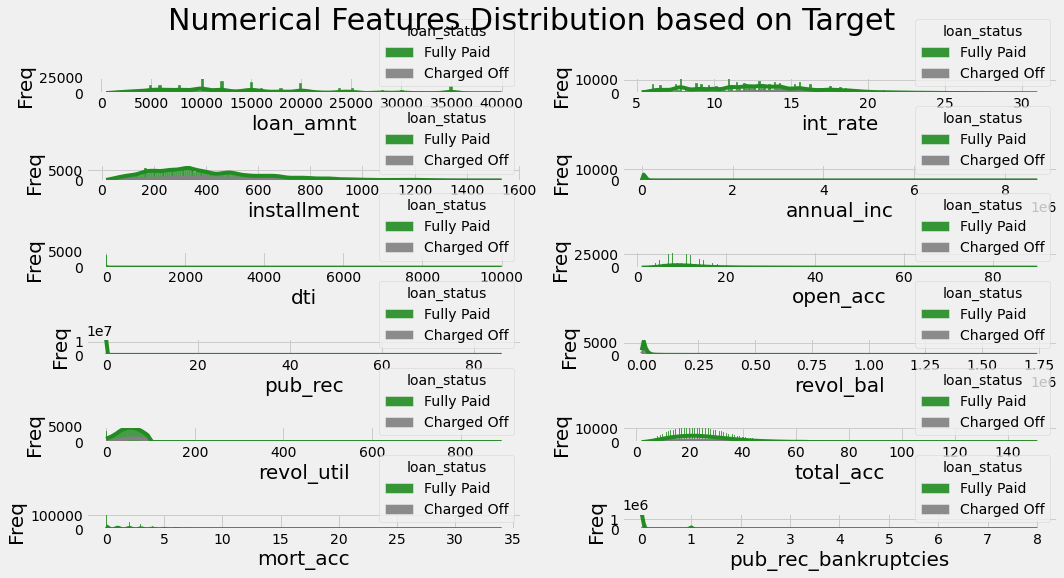

In [46]:
plt.figure(figsize=(15, 8))
plt.suptitle('Numerical Features Distribution based on Target', fontsize = 30, y = 1.005)
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//2, 2, i+1)
    ax = sns.histplot(
        x = df_data[num_cols[i]],
        kde = True,
        hue = df_data['loan_status'],
        hue_order = ["Fully Paid", "Charged Off"],
        palette = palette, alpha = 0.9
    )
    ax.set_xlabel(num_cols[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
plt.tight_layout()
plt.show()

If we see the distribution between those who ended up filly paid and those who jcharged off, almost all of the distribution on each column looks similar. Let's take a closer look at the boxplot

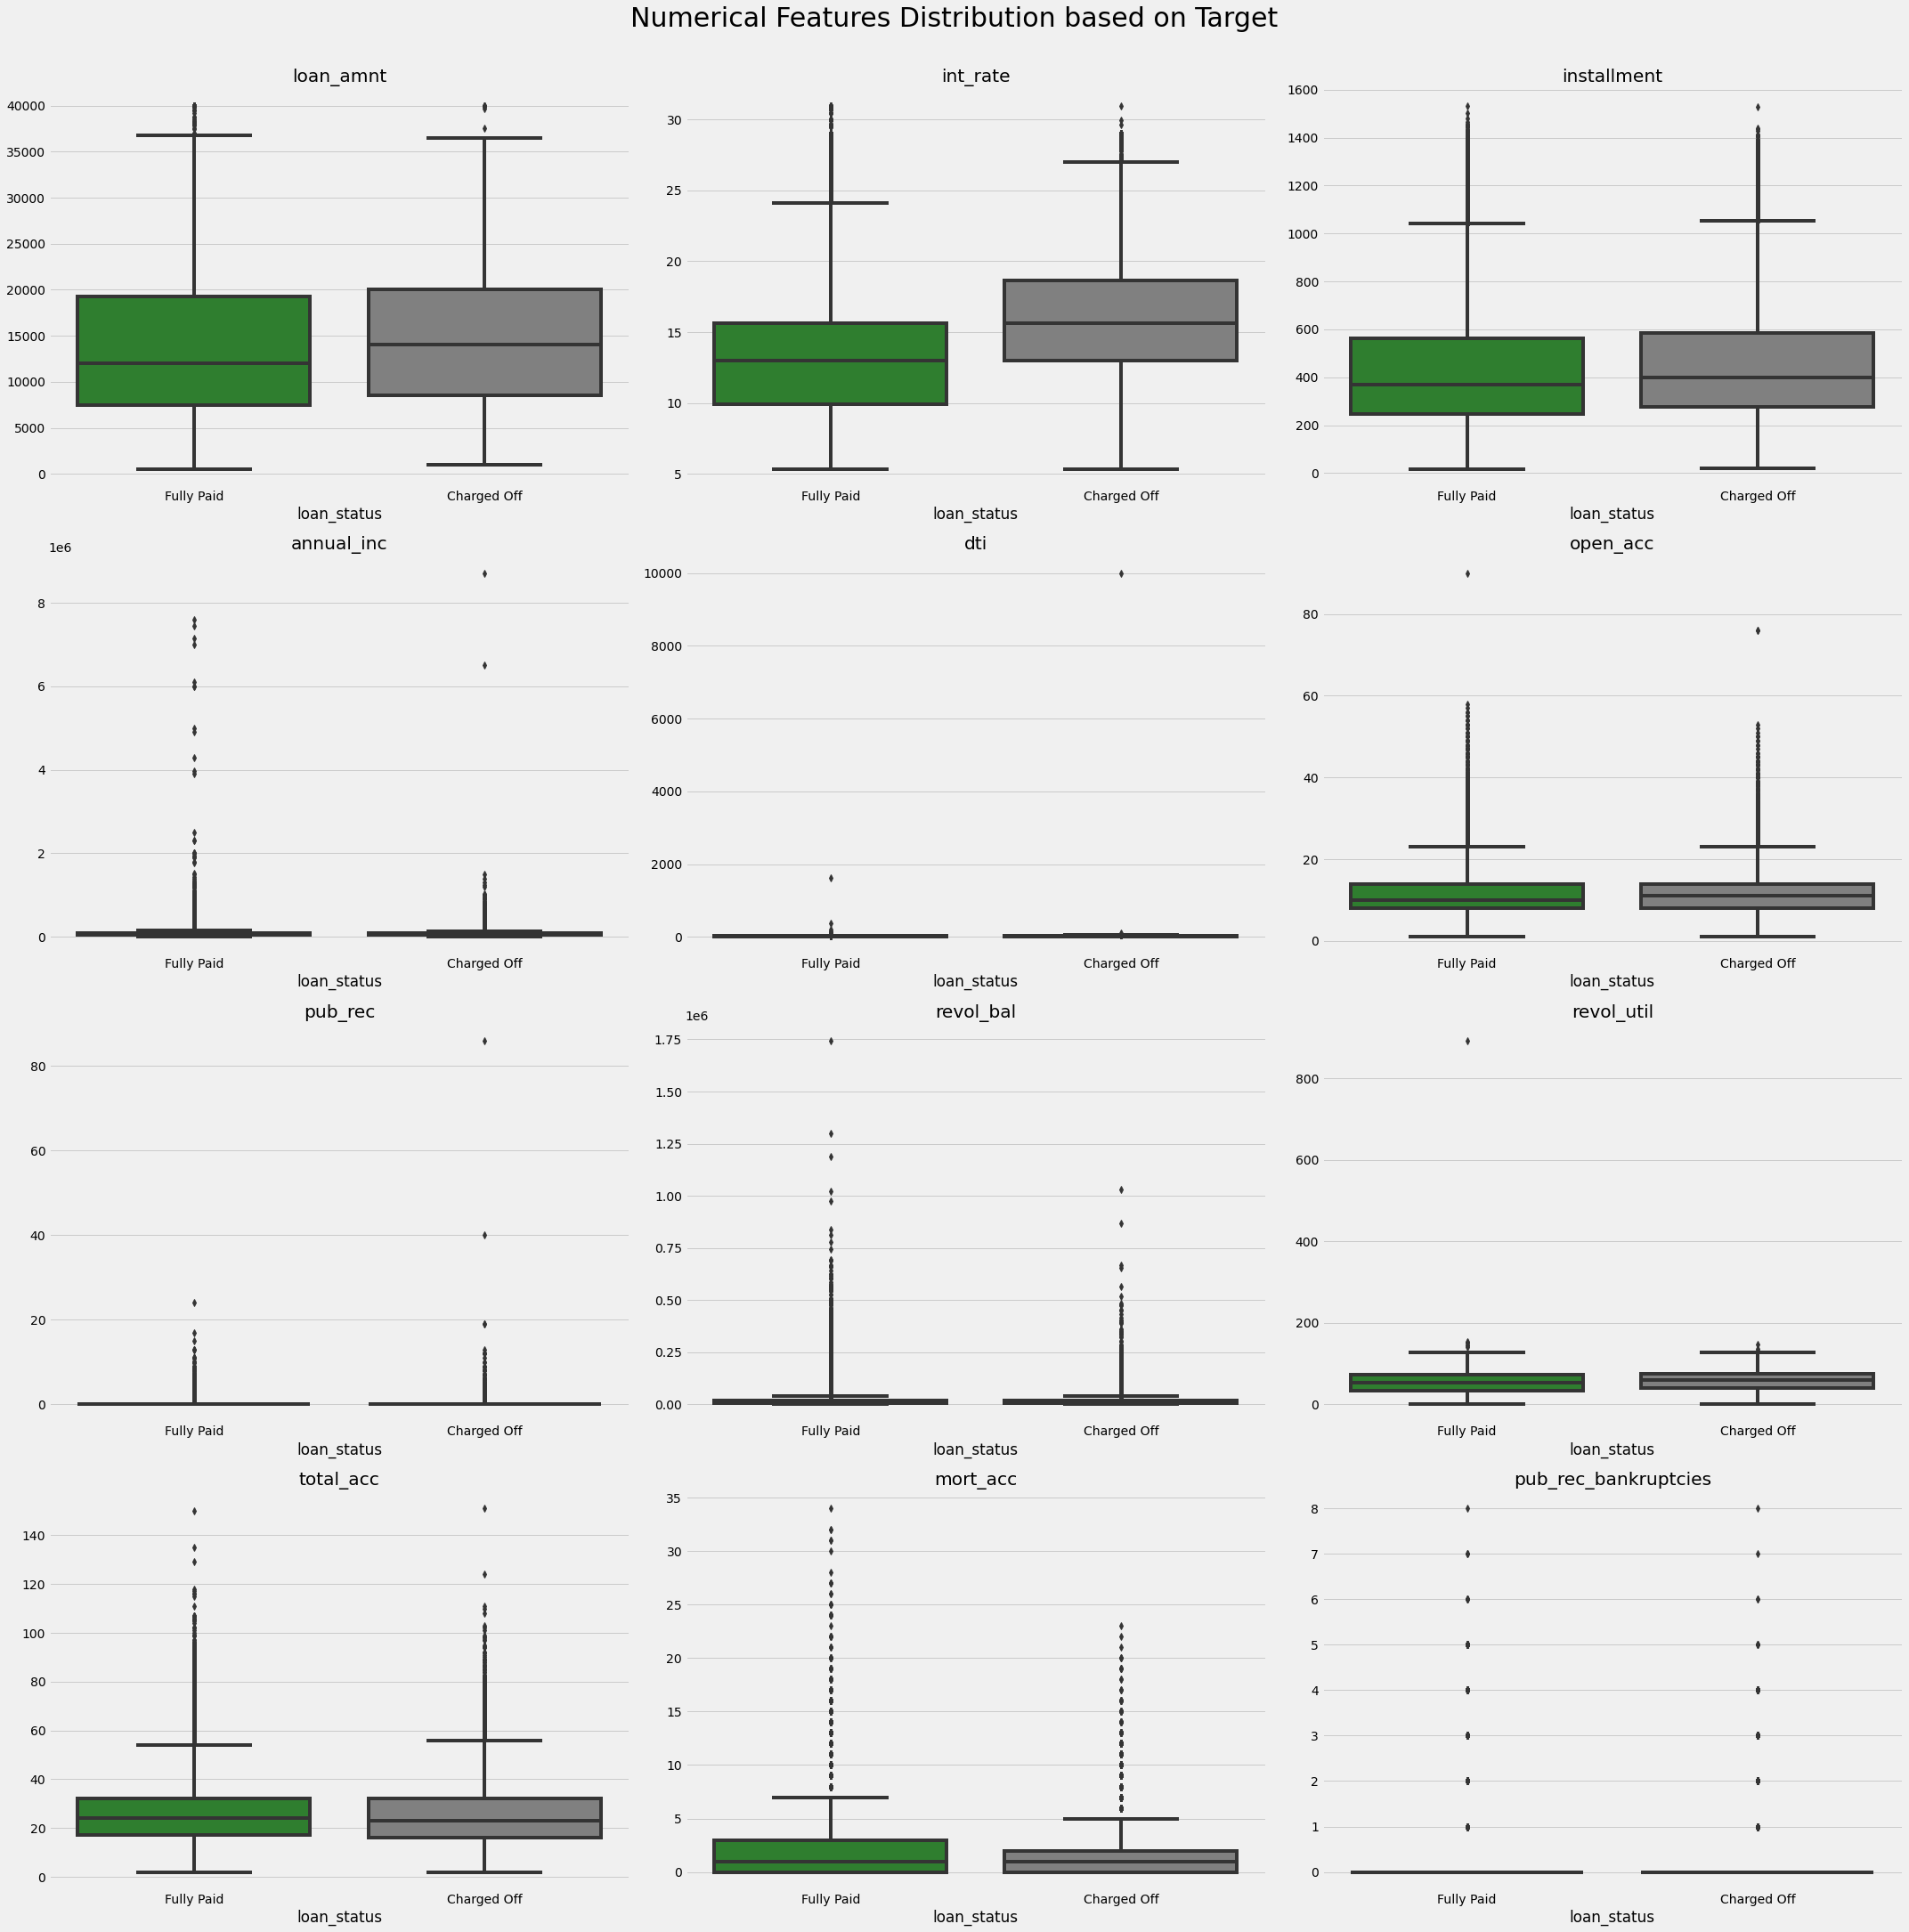

In [47]:
plt.figure(figsize=(30, 30))
plt.suptitle('Numerical Features Distribution based on Target', fontsize = 30, y = 1.005)
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3, 3, i+1)
    ax = sns.boxplot(
        y = df_data[num_cols[i]],
        x = df_data['loan_status'],
        palette = palette
    )
    ax.set_ylabel('')
    ax.set_title(num_cols[i])
plt.tight_layout()
plt.show()

The majority of the customer who ended up buying has a greater median on loan amount, int_rate, installment, revol_util,and open_acc.

They also have a smaller median on total_acc and mort_acc.

There are some value that might be representation of a nominal variable. These values can't be treated as numerical, hence, we will do some preprocessing for them later.

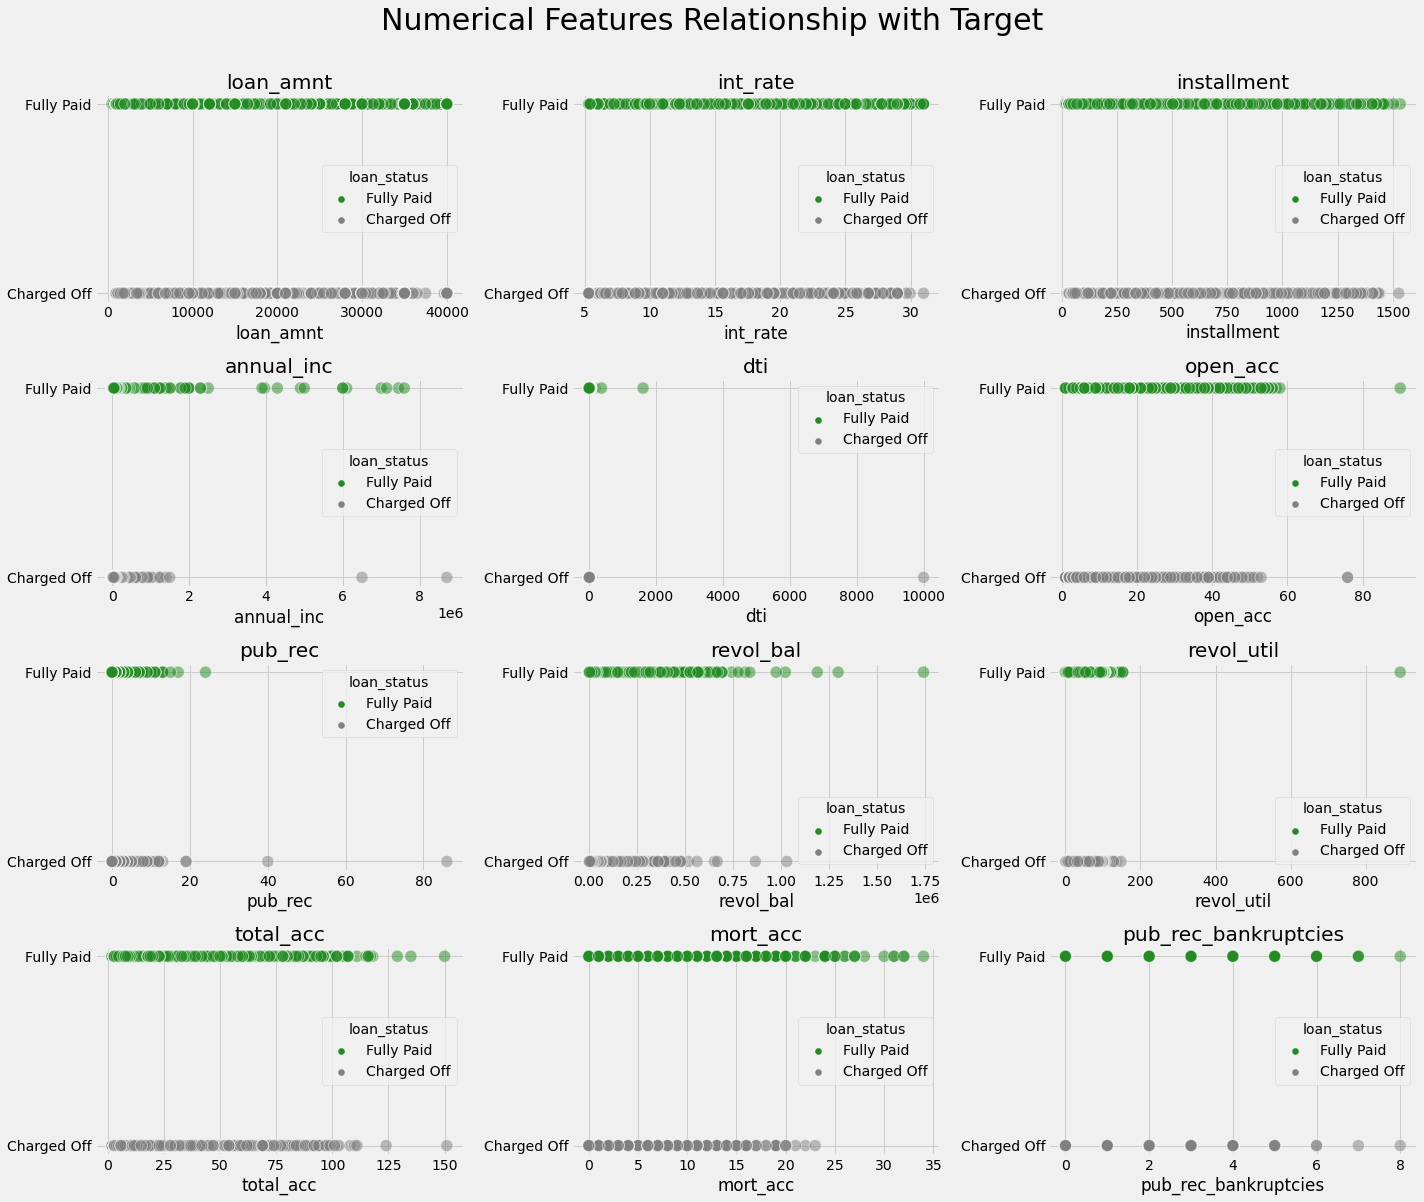

In [48]:
plt.figure(figsize=(20, 20))
plt.suptitle('Numerical Features Relationship with Target', fontsize = 30, y = 1.005)
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.scatterplot(
        x = df_data[num_cols[i]],
        y = df_data['loan_status'], hue = df_data['loan_status'],
        palette = palette, s = 150, alpha = 0.5
    )
    ax.set_ylabel('')
    ax.set_title(num_cols[i])
plt.tight_layout()
plt.show()

The relationships between the columns and the target variable can also be seen in the plot above. It has the same conclusion as the previous plot but the outliers and the limit of the majority values seem to be clearer.

1. The majority who end up fully paid, have a total greater mort_acc, total acc, revol_bal and annlua_inc.

#### Multivariate

Plot the correlation to check for multicollinearity between predictors and also to check correlation towards the target variable.

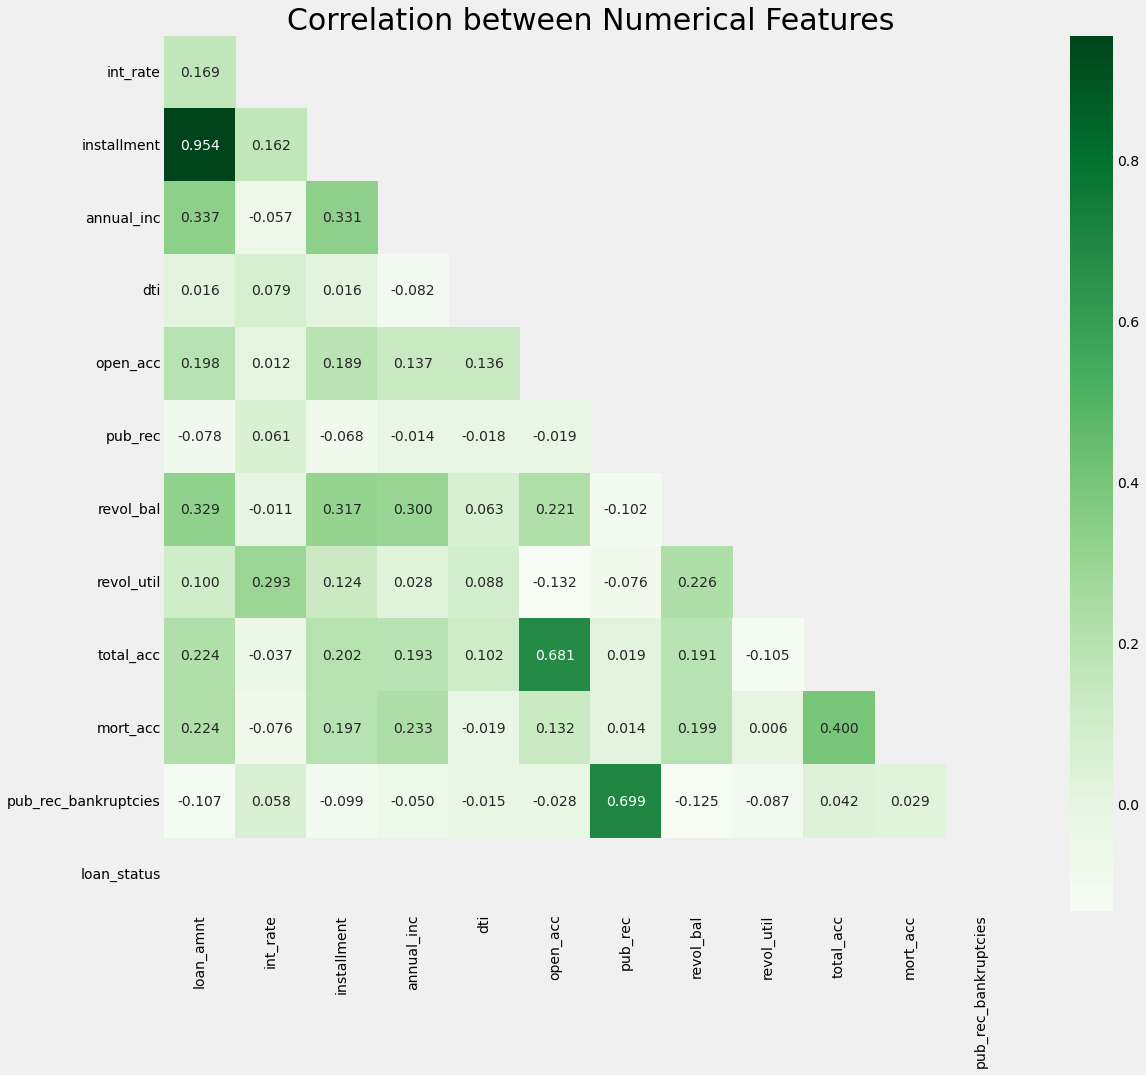

In [49]:
df_corr = df_data.copy()
df_corr['loan_status'] = np.where(df_corr['loan_status'] == True, 1, 0)

corr_ = df_corr[num_cols + ["loan_status"]].corr(method = 'pearson')
corr_ = corr_.mask(np.tril(np.ones(corr_.shape)).T.astype(np.bool_)).drop(columns=['loan_status'], index = 'loan_amnt')

plt.figure(figsize = (17, 15))
sns.heatmap(
    corr_,
    annot = True,
    fmt = '.3f',
    cmap = 'Greens'
)
plt.title("Correlation between Numerical Features",fontsize=30)
plt.yticks(rotation=0)
plt.show()

In [50]:
highly_correlated = corr_.round(decimals = 3)[corr_.round(decimals = 3)> 0.5].dropna(axis=0, how="all").dropna(axis=1, how="all")
highly_correlated

,loan_amnt,open_acc,pub_rec
installment,0.95,NaN,NaN
total_acc,NaN,0.68,NaN
pub_rec_bankruptcies,NaN,NaN,0.70


Some numerical features are correlated, strong correlation, and very strong correlation. Those who have correlations with another predictor, need to be removed if we want to try a linear-based or specifically logistic regression model. Due to the assumption underlying the model:

Basic assumptions that must be met for logistic regression include the independence of errors, linearity in the logit for continuous variables, absence of multicollinearity, and lack of strongly influential outliers.

We can check the VIF (Variance Inflation Factor) to be sure. This will be done in the feature selection step.

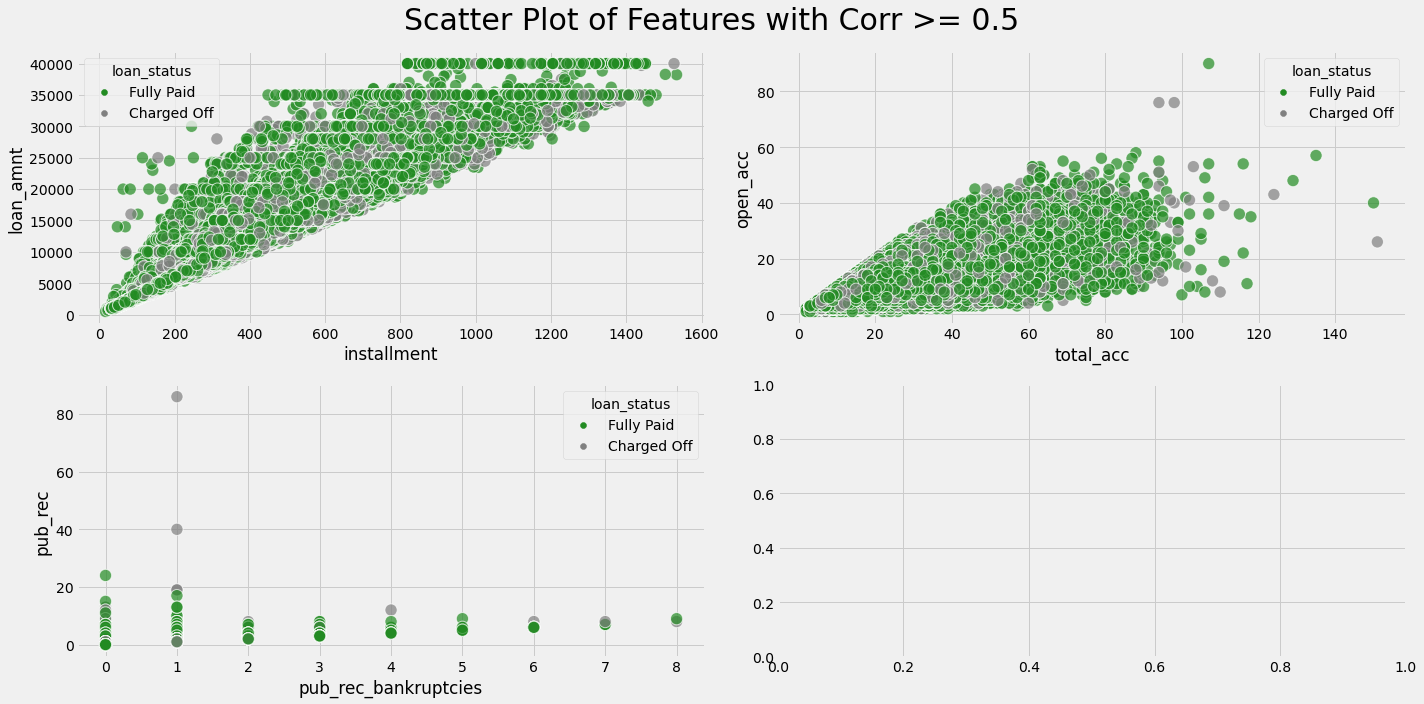

In [51]:
fig, axes = plt.subplots(2, 2, figsize = (20, 10))
plt.suptitle('Scatter Plot of Features with Corr >= 0.5', fontsize = 30)
sns.scatterplot(x = df_data['installment'], y = df_data['loan_amnt'], ax = axes[0,0], hue = df_data['loan_status'], palette = palette, s = 150, alpha = 0.7)
axes[0,0].set_xlabel('installment')
axes[0,0].set_ylabel('loan_amnt')

sns.scatterplot(x = df_data['total_acc'], y = df_data['open_acc'], ax = axes[0,1], hue = df_data['loan_status'], palette = palette, s = 150, alpha = 0.7)
axes[0,1].set_xlabel('total_acc')
axes[0,1].set_ylabel('open_acc')

sns.scatterplot(x = df_data['pub_rec_bankruptcies'], y = df_data['pub_rec'], ax = axes[1,0], hue = df_data['loan_status'], palette = palette, s = 150, alpha = 0.7)
axes[1,0].set_xlabel('pub_rec_bankruptcies')
axes[1,0].set_ylabel('pub_rec')


plt.tight_layout()
plt.show()

### Target Variabel

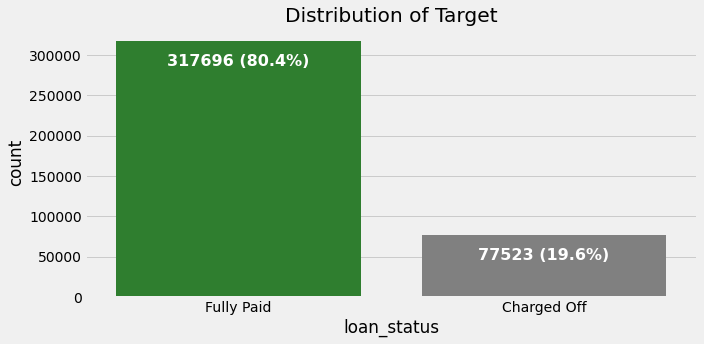

In [52]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(
    x = df_data["loan_status"], palette = palette
)
ax.set_title("Distribution of Target")
# annotate bar
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f') + " (" + format(p.get_height()*100/len(df_data), '.1f') + "%)",
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center',
        fontweight = 'semibold',
        size = 16,
        xytext = (0, -25), 
        textcoords = 'offset points',
        color = 'white'
    )
plt.tight_layout()
plt.show()

This dataset has an imbalance class/target variable. It might be a good idea to do sampling on the training set to achieve better performance as we know some models learned better with more balance training samples

### Data Preprocessing

#### Target Variabel

In [53]:
df_data['loan_status'].value_counts()

Fully Paid     317696
Charged Off     77523
Name: loan_status, dtype: int64

In [54]:
df_data['loan_status'] = np.where(df_data['loan_status'] == "Fully Paid", 1, 0)

In [55]:
df_data['loan_status'].value_counts()

1    317696
0     77523
Name: loan_status, dtype: int64

### Categorical Variables and Dummy Variables

In [56]:
print([column for column in df_data.columns if df_data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address']


#### Term

In [57]:
df_data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [58]:
term_values = {' 36 months': 36, ' 60 months': 60}
df_data['term'] = df_data.term.map(term_values)

In [59]:
df_data.term.unique()

array([36, 60], dtype=int64)

#### Grade & Sub_Grade

We know that grade is just a sub feature of sub_grade, So we are goinig to drop it.

In [60]:
df_data.drop('grade', axis=1, inplace=True)

In [61]:
dummies = ['sub_grade', 'verification_status', 'purpose', 'initial_list_status', 
           'application_type', 'home_ownership']
df_data = pd.get_dummies(data, columns=dummies, drop_first=True)

#### Adress

We are going to feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.

In [62]:
df_data.address.head()

0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [63]:
df_data['zip_code'] = df_data.address.apply(lambda x: x[-5:])

In [64]:
df_data.zip_code.value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [65]:
df_data = pd.get_dummies(df_data, columns=['zip_code'], drop_first=True)

In [66]:
df_data.drop('address', axis=1, inplace=True)

#### Issue_ID

This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [67]:
df_data.drop('issue_d', axis=1, inplace=True)

#### earliest_cr_line

This appears to be a historical time stamp feature. Extract the year from this feature using a .apply() function, then convert it to a numeric feature.

In [68]:
df_data['earliest_cr_line'] = pd.to_datetime(df_data['earliest_cr_line'])

In [69]:
df_data['earliest_cr_line']  = df_data['earliest_cr_line'].dt.strftime('%Y')

In [70]:
df_data.head ()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.00,36,11.44,329.48,117000.00,1,26.24,1990,16.00,0.00,36369.00,41.80,25.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000.00,36,11.99,265.68,65000.00,1,22.05,2004,17.00,0.00,20131.00,53.30,27.00,3.00,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.00,36,10.49,506.97,43057.00,1,12.79,2007,13.00,0.00,11987.00,92.20,26.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200.00,36,6.49,220.65,54000.00,1,2.60,2006,6.00,0.00,5472.00,21.50,13.00,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375.00,60,17.27,609.33,55000.00,0,33.95,1999,13.00,0.00,24584.00,69.80,43.00,1.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [71]:
df_data.head ()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.00,36,11.44,329.48,117000.00,1,26.24,1990,16.00,0.00,36369.00,41.80,25.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000.00,36,11.99,265.68,65000.00,1,22.05,2004,17.00,0.00,20131.00,53.30,27.00,3.00,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.00,36,10.49,506.97,43057.00,1,12.79,2007,13.00,0.00,11987.00,92.20,26.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200.00,36,6.49,220.65,54000.00,1,2.60,2006,6.00,0.00,5472.00,21.50,13.00,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375.00,60,17.27,609.33,55000.00,0,33.95,1999,13.00,0.00,24584.00,69.80,43.00,1.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [72]:
df_data ['loan_status'].unique ()

array([1, 0])

### Removing Outliers

Treating the outliers to have more generalized models, especially on the one that uses linear-based model or distance-based model.

In [74]:
df_data.head ()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.00,36,11.44,329.48,117000.00,1,26.24,1990,16.00,0.00,36369.00,41.80,25.00,0.00,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,8000.00,36,11.99,265.68,65000.00,1,22.05,2004,17.00,0.00,20131.00,53.30,27.00,3.00,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.00,36,10.49,506.97,43057.00,1,12.79,2007,13.00,0.00,11987.00,92.20,26.00,0.00,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,7200.00,36,6.49,220.65,54000.00,1,2.60,2006,6.00,0.00,5472.00,21.50,13.00,0.00,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,24375.00,60,17.27,609.33,55000.00,0,33.95,1999,13.00,0.00,24584.00,69.80,43.00,1.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0


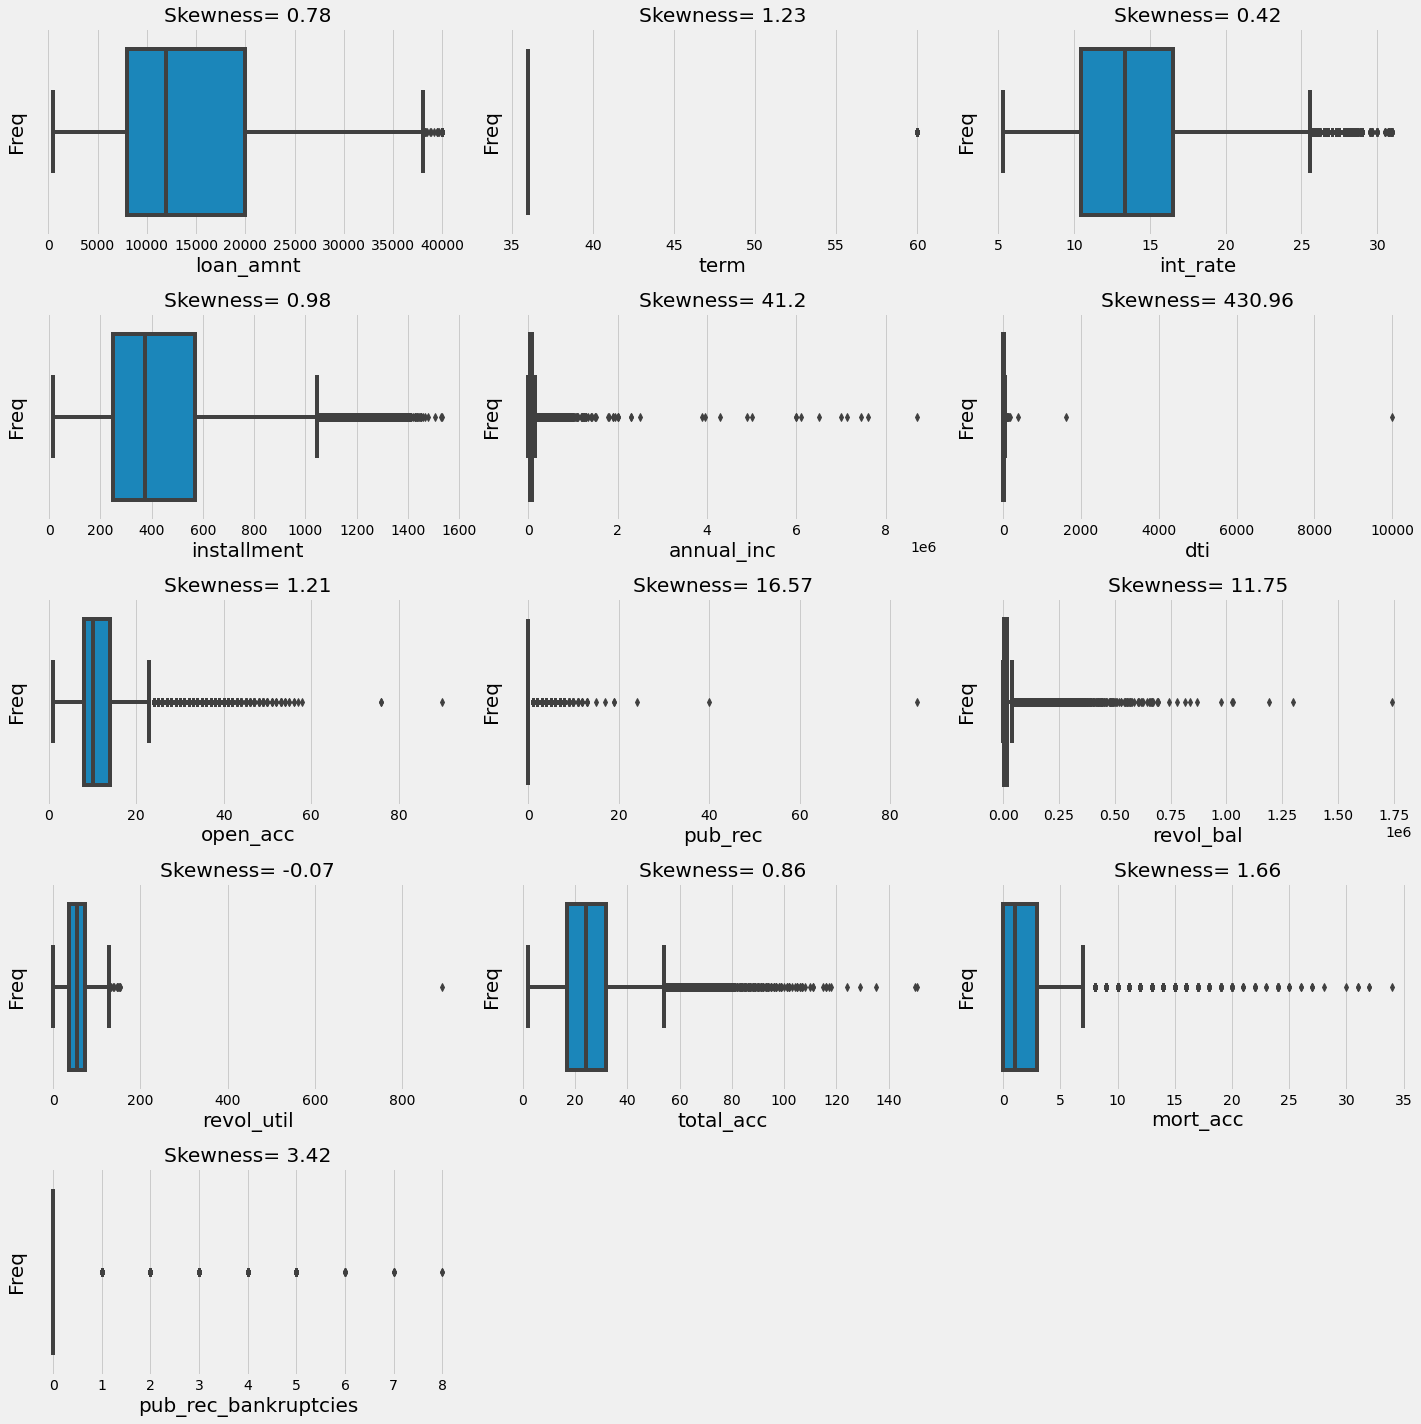

In [75]:
num_cols = df_data.drop(columns=['loan_status']).select_dtypes("number").iloc[:, :13].columns.tolist()
plt.figure(figsize=(20, 20))
for i in range(len(num_cols)):
    plt.subplot(len(num_cols)//3+1, 3, i+1)
    ax = sns.boxplot(
        df_data[num_cols[i]],
    )
    ax.set_xlabel(num_cols[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.set_title(f"Skewness= {str(round(df_data[num_cols[i]].skew(),2))}")
plt.tight_layout()
plt.show()

In [76]:
df_data[num_cols].skew()

loan_amnt                0.78
term                     1.23
int_rate                 0.42
installment              0.98
annual_inc              41.20
dti                    430.96
open_acc                 1.21
pub_rec                 16.57
revol_bal               11.75
revol_util              -0.07
total_acc                0.86
mort_acc                 1.66
pub_rec_bankruptcies     3.42
dtype: float64



Transformed only the features that have skewness > 0.5. or < -0.5. We also need to take a closer look at the information contains by each variable. There might be more than one solution to treat the outlier.

If we investigate each numerical variable, there are some numerical variables that originated from a nominal categorical variable. In this particular dataset, they are OperatingSystems, Browser, and Region. The outliers in these 3 features, can be transformed into a one-hot encoding. But before doing one-hot encoding, we have to group them into a bin of most frequent value and the least frequent value. Some of the most frequent values will be put in one group alone, and the least frequent will be grouped into one group.

The special day also looks like an encoded nominal value. But, the range is in float which might be another different case. We have to investigate it in a different parts. Except for the mentioned features, we can do outlier handling with log transformation and compare the skewness value.


In [77]:
transformed_to_log = df_data[num_cols].iloc[:,:9]
transformed_to_log

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal
0,10000.00,36,11.44,329.48,117000.00,26.24,16.00,0.00,36369.00
1,8000.00,36,11.99,265.68,65000.00,22.05,17.00,0.00,20131.00
2,15600.00,36,10.49,506.97,43057.00,12.79,13.00,0.00,11987.00
3,7200.00,36,6.49,220.65,54000.00,2.60,6.00,0.00,5472.00
4,24375.00,60,17.27,609.33,55000.00,33.95,13.00,0.00,24584.00
...,...,...,...,...,...,...,...,...,...
396025,10000.00,60,10.99,217.38,40000.00,15.63,6.00,0.00,1990.00
396026,21000.00,36,12.29,700.42,110000.00,21.45,6.00,0.00,43263.00
396027,5000.00,36,9.99,161.32,56500.00,17.56,15.00,0.00,32704.00
396028,21000.00,60,15.31,503.02,64000.00,15.88,9.00,0.00,15704.00


Using logarithmic transformation with a natural logarithm of one plus (to prevent error on a really small value).

In [78]:
skewed = transformed_to_log.columns.tolist()
for i in range(len(skewed)):
    df_data[skewed[i]] = np.log1p(df_data[skewed[i]])

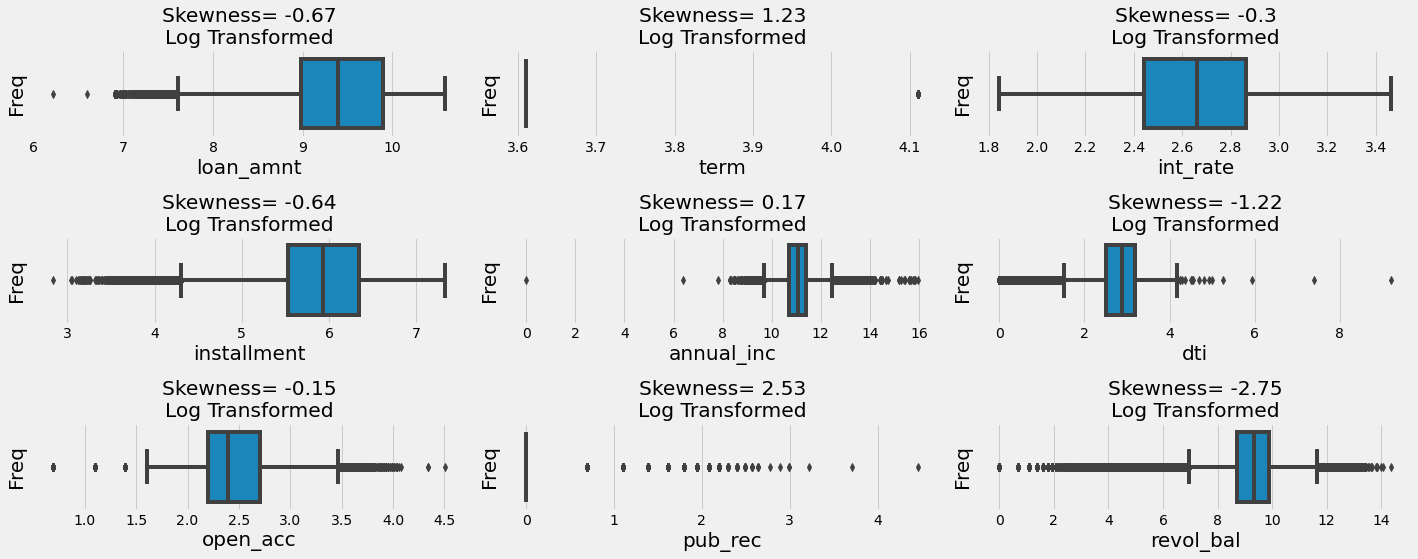

In [79]:
plt.figure(figsize=(20, 10))
for i in range(len(skewed)):
    plt.subplot(len(skewed)//3+1, 3, i+1)
    ax = sns.boxplot(
        df_data[skewed[i]],
    )
    ax.set_xlabel(skewed[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.set_title(f"Skewness= {str(round(df_data[skewed[i]].skew(),2))}\nLog Transformed")
plt.tight_layout()
plt.show()

Only 3 value looks symmetric now (at least the skewness is above -0.5 or below 0.5). These features are int_rate, anual_inc, and open_acc. We are left with 6 features that are still highly skewed. Another solution is to drop or cap them into an upper and lower limit of IQR -+1.5 method or known as Tukey's rule.

If we consider the amount of data that we currently have, it might be better to cap them instead of dropping the outliers, because we might lose some information.


In [80]:
skewed = df_data[skewed].drop(columns =['int_rate', 'annual_inc', 'open_acc']).columns.tolist()

In [81]:
skewed = skewed[2:]

In [82]:
df_data[skewed + ["loan_status"]].groupby(['loan_status']).median()

,installment,dti,pub_rec,revol_bal
loan_status,,,,
0,5.99,3.01,0.00,9.33
1,5.92,2.85,0.00,9.32


In [83]:
df_data[skewed].median()

installment   5.93
dti           2.89
pub_rec       0.00
revol_bal     9.32
dtype: float64

The pub_rec might have a median equal to 0 in the overall distribution, but there's a significant difference in class 1. It might be a good predictor. And also, if we treat the outliers, all rows will be equal to 0.0 which is not good, we will lose all information from this variable. Thus, we will just let PageValues without treating the outliers.

In [84]:
def cap_outliers_tukey(x, Q1, Q3):
    '''
    to cap outliers using tukey method
    '''
    IQR = Q3 - Q1
    low_limit = Q1 - (1.5 * IQR)
    high_limit = Q3 + (1.5 * IQR)
    
    if x < low_limit:
        x = low_limit
    elif x > high_limit:
        x = high_limit
    return x

In [85]:
installment_q1 = df_data['installment'].quantile(0.25)
installment_q3 = df_data['installment'].quantile(0.75)
df_data['installment'] = df_data.apply(lambda x: cap_outliers_tukey(x['installment'], installment_q1, installment_q3), axis = 1)

dti_q1 = df_data['dti'].quantile(0.25)
dti_q3 = df_data['dti'].quantile(0.75)
df_data['dti'] = df_data.apply(lambda x: cap_outliers_tukey(x['dti'], dti_q1, dti_q3), axis = 1)

revol_bal_q1 = df_data['revol_bal'].quantile(0.25)
revol_bal_q3 = df_data['revol_bal'].quantile(0.75)
df_data['revol_bal'] = df_data.apply(lambda x: cap_outliers_tukey(x['revol_bal'], revol_bal_q1, revol_bal_q3), axis = 1)

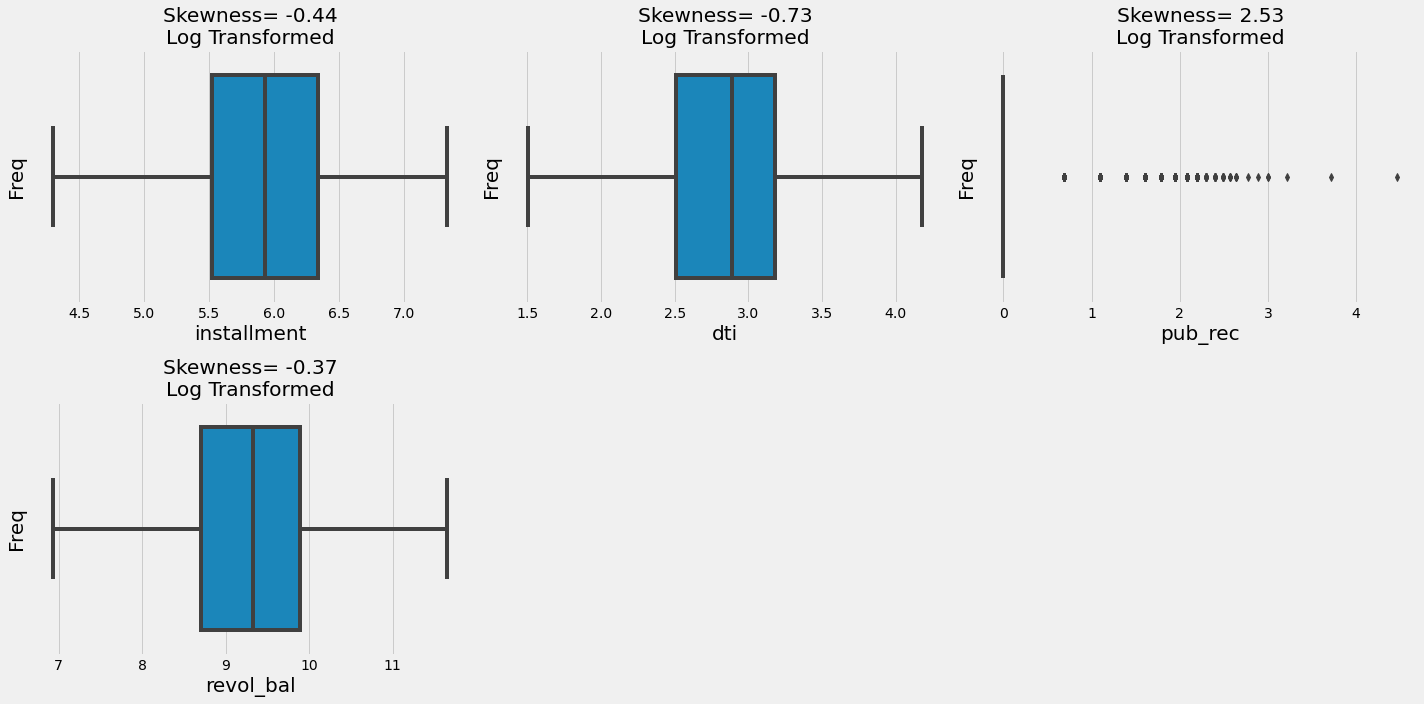

In [86]:
plt.figure(figsize=(20, 10))
for i in range(len(skewed)):
    plt.subplot(len(skewed)//3+1, 3, i+1)
    ax = sns.boxplot(
        df_data[skewed[i]],
    )
    ax.set_xlabel(skewed[i], fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.set_title(f"Skewness= {str(round(df_data[skewed[i]].skew(),2))}\nLog Transformed")
plt.tight_layout()
plt.show()

Some of the features still look asymmetrical even after transformation. But even so, all of the skewness value is smaller now.

### Split Dataset

In [101]:
w_p = df_data.loan_status.value_counts()[0] / df_data.shape[0]
w_n = df_data.loan_status.value_counts()[1] / df_data.shape[0]

print(f"Weight of positive values {w_p}")
print(f"Weight of negative values {w_n}")



Weight of positive values 0.19615200686201828
Weight of negative values 0.8038479931379817


In [102]:
train, test = train_test_split(df_data, test_size=0.33, random_state=42)

print(train.shape)
print(test.shape)

(264796, 81)
(130423, 81)


### Normalizing Data

In [103]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [104]:
X_train.dtypes

loan_amnt         float64
term              float64
int_rate          float64
installment       float64
annual_inc        float64
                   ...   
zip_code_30723      uint8
zip_code_48052      uint8
zip_code_70466      uint8
zip_code_86630      uint8
zip_code_93700      uint8
Length: 80, dtype: object

In [105]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Models Building

In [107]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")


In [108]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

### Artifician Neural Network

In [130]:
def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [131]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Train on 264796 samples, validate on 130423 samples
Epoch 1/20
264796/264796 [==============================] - 39s 146us/sample - loss: 0.3066 - AUC: 0.8613 - val_loss: 0.2642 - val_AUC: 0.9012
Epoch 2/20
264796/264796 [==============================] - 37s 141us/sample - loss: 0.2913 - AUC: 0.8769 - val_loss: 0.2612 - val_AUC: 0.9039
Epoch 3/20
264796/264796 [==============================] - 38s 142us/sample - loss: 0.2848 - AUC: 0.8832 - val_loss: 0.2631 - val_AUC: 0.9042
Epoch 4/20
264796/264796 [==============================] - 38s 144us/sample - loss: 0.2823 - AUC: 0.8857 - val_loss: 0.2629 - val_AUC: 0.9050
Epoch 5/20
264796/264796 [==============================] - 38s 142us/sample - loss: 0.2806 - AUC: 0.8874 - val_loss: 0.2589 - val_AUC: 0.9058
Epoch 6/20
264796/264796 [==============================] - 37s 141us/sample - loss: 0.2793 - AUC: 0.8887 - val_loss: 0.2586 - val_AUC: 0.9065
Epoch 7/20
264796/264796 [==============================] - 37s 141us/sample - loss: 0.278

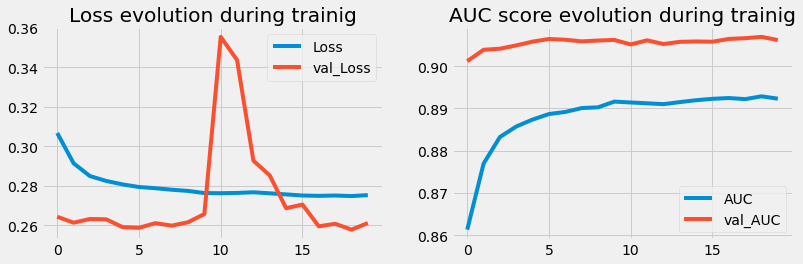

In [132]:
plot_learning_evolution(r)

In [133]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

Train Result:
Accuracy Score: 88.81%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.86      0.89      0.89       0.88          0.89
recall        0.51      0.98      0.89       0.75          0.89
f1-score      0.64      0.93      0.89       0.79          0.88
support   52043.00 212753.00      0.89  264796.00     264796.00
_______________________________________________
Confusion Matrix: 
 [[ 26615  25428]
 [  4206 208547]]



In [134]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

Test Result:
Accuracy Score: 88.76%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.86      0.89      0.89       0.87          0.88
recall        0.51      0.98      0.89       0.74          0.89
f1-score      0.64      0.93      0.89       0.79          0.88
support   25480.00 104943.00      0.89  130423.00     130423.00
_______________________________________________
Confusion Matrix: 
 [[ 12989  12491]
 [  2167 102776]]



In [135]:
scores_dict = {
    'ANNs': {
        'Train': roc_auc_score(y_train, model.predict(X_train)),
        'Test': roc_auc_score(y_test, model.predict(X_test)),
    },
}

### Decision Tree

In [165]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, y_train)

y_train_pred = Decision_Tree.predict(X_train)
y_test_pred = Decision_Tree.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      1.00      1.00       1.00          1.00
recall        1.00      1.00      1.00       1.00          1.00
f1-score      1.00      1.00      1.00       1.00          1.00
support   52043.00 212753.00      1.00  264796.00     264796.00
_______________________________________________
Confusion Matrix: 
 [[ 52043      0]
 [     0 212753]]

Test Result:
Accuracy Score: 83.09%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.56      0.90      0.83       0.73          0.83
recall        0.60      0.89      0.83       0.74          0.83
f1-score      0.58      0.89      0.83       0.74          0.83
support   25480.00 104943.00      0.83  130423.00     130423.00
________________________________________

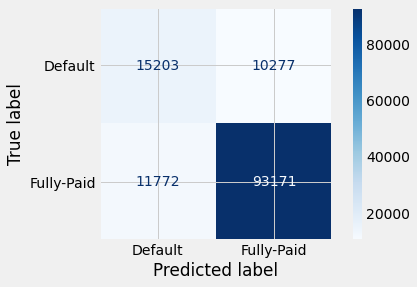

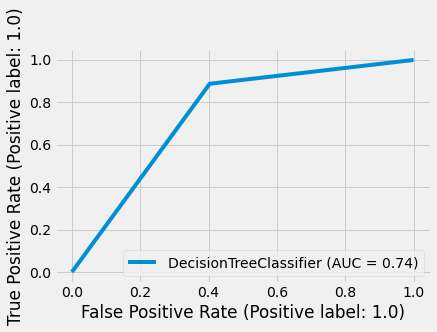

In [166]:
disp = plot_confusion_matrix(
    Decision_Tree, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = plot_roc_curve(Decision_Tree, X_test, y_test)

In [167]:
scores_dict['Decision Tree'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

### Random Forest Classifier

In [168]:
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     1.00      1.00      1.00       1.00          1.00
recall        1.00      1.00      1.00       1.00          1.00
f1-score      1.00      1.00      1.00       1.00          1.00
support   52043.00 212753.00      1.00  264796.00     264796.00
_______________________________________________
Confusion Matrix: 
 [[ 52042      1]
 [     0 212753]]

Test Result:
Accuracy Score: 88.91%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.95      0.88      0.89       0.92          0.90
recall        0.45      0.99      0.89       0.72          0.89
f1-score      0.62      0.94      0.89       0.78          0.87
support   25480.00 104943.00      0.89  130423.00     130423.00
________________________________________

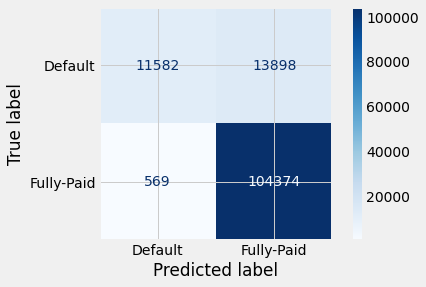

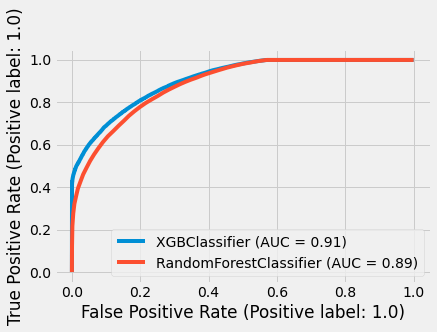

In [169]:
disp = plot_confusion_matrix(rf_clf, X_test, y_test, 
                             cmap='Blues', values_format='d', 
                             display_labels=['Default', 'Fully-Paid'])

disp = plot_roc_curve(xgb_clf, X_test, y_test)
plot_roc_curve(rf_clf, X_test, y_test, ax=disp.ax_)

In [172]:
scores_dict['Random Forest'] = {
        'Train': roc_auc_score(y_train, rf_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, rf_clf.predict(X_test)),
    }

### XGBoost Classifier

In [173]:
xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

[21:11:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 89.61%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  weighted avg
precision     0.94      0.89      0.90       0.92          0.90
recall        0.50      0.99      0.90       0.75          0.90
f1-score      0.65      0.94      0.90       0.80          0.88
support   52043.00 212753.00      0.90  264796.00     264796.00
_______________________________________________
Confusion Matrix: 
 [[ 26103  25940]
 [  1560 211193]]

Test Result:
Accuracy Score: 88.95%
_______________________________________________
CLASSIFICATION REPORT:
               0.0       1.0  accuracy  macro avg  

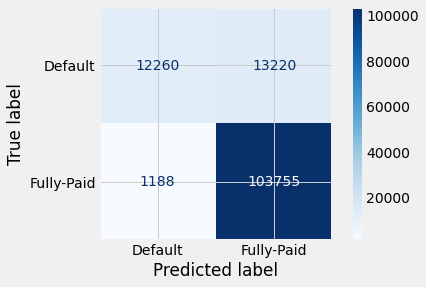

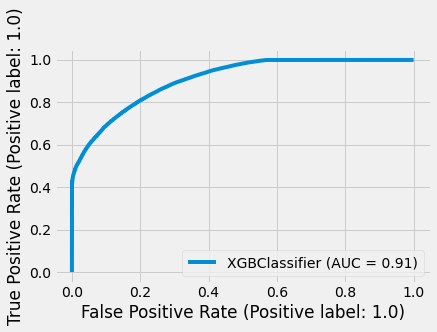

In [174]:
disp = plot_confusion_matrix(
    xgb_clf, X_test, y_test, 
    cmap='Blues', values_format='d', 
    display_labels=['Default', 'Fully-Paid']
)

disp = plot_roc_curve(xgb_clf, X_test, y_test)

In [175]:
scores_dict['XGBoost'] = {
        'Train': roc_auc_score(y_train, xgb_clf.predict(X_train)),
        'Test': roc_auc_score(y_test, xgb_clf.predict(X_test)),
    }

### Compare Model

In [184]:
ml_models = {
    'Random Forest': rf_clf, 
    'XGBoost': xgb_clf, 
    'ANNs': model,
    'Decision Tree' : Decision_Tree
}

for model in ml_models:
    print(f"{model.upper():{30}} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")

RANDOM FOREST                  roc_auc_score: 0.725
XGBOOST                        roc_auc_score: 0.735


AttributeError: 'str' object has no attribute 'predict'

In [185]:
scores_df = pd.DataFrame(scores_dict)
scores_df

,ANNs,Random Forest,XGBoost,Decision Tree
Train,0.91,1.00,0.75,1.00
Test,0.91,0.72,0.73,0.72


In [186]:
scores_df.T

,Train,Test
ANNs,0.91,0.91
Random Forest,1.00,0.72
XGBoost,0.75,0.73
Decision Tree,1.00,0.72


#### Train Model

In [188]:
model_train = {'Model': ['ANNs', 'Random Forest', 'XGBoost', 'Decision Tree'], 'Train': [0.91, 1.00, 0.75, 1.00]}  
model_train = pd.DataFrame(model_train) 
model_train

,Model,Train
0,ANNs,0.91
1,Random Forest,1.00
2,XGBoost,0.75
3,Decision Tree,1.00


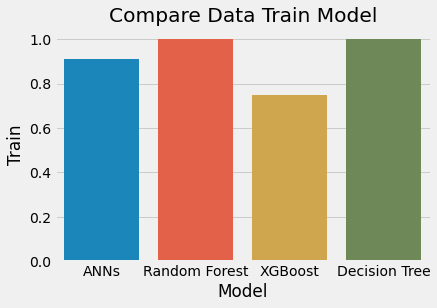

In [192]:
sns.barplot (data = model_train, x = 'Model', y = 'Train').set(title = 'Compare Data Train Model')
plt.show ()

#### Test Model

In [195]:
model_test = {'Model': ['ANNs', 'Random Forest', 'XGBoost', 'Decision Tree'], 'Test': [0.91, 0.72, 0.73, 0.72]}  
model_test = pd.DataFrame(model_test) 
model_test

,Model,Test
0,ANNs,0.91
1,Random Forest,0.72
2,XGBoost,0.73
3,Decision Tree,0.72


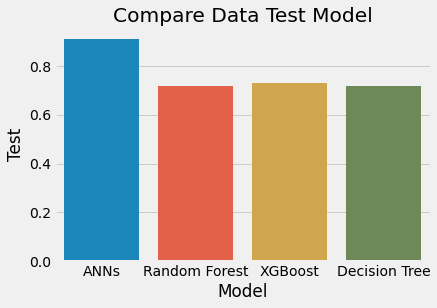

In [196]:
sns.barplot (data = model_test, x = 'Model', y = 'Test').set(title = 'Compare Data Test Model')
plt.show ()

## Conclusion

### Preface

This dataset contains lending data from peer to peer lending company, there are 26 predictors and a target variable that determined whether the loan status are fully paid or charged off.  Using this dataset, this project aim T to identify the risky applicants  is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who defaultcause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

### Evaluation

The evaluation metrics that will be the main concerned in this project is AUC and Precision. The reason behing this decision is due to the nature of the data that has imbalance class, thus the accuracy won’t represent the model's actual performance. As for Precision, we want to minimize the number of False Positives that happen. This is based on the consideration of which error will bring more harm towards the company, mostly fully paid or charged off. The result of this prediction model can be obtained will be utilized to decide whether the loan status of creditors or lenders will approved or no based on the informational data given in dataset. 

### Exploration and Overall Analysis

#### Distribution

1. All of the numerical are positively skewed except for revol_util
2. The skewed might be due to those creditors whether the application status was fully paid or charged off. 
3. pub_rec_bankruptcies doesn't contain that many outliers, most of the value is around 0.0

#### Relationship with Target Variabel

1. The distribution between those who ended up filly paid and those who jcharged off, almost all of the distribution on each column looks similar. 
2. The majority of the customer who ended up buying has a greater median on loan amount, int_rate, installment, revol_util,and open_acc.
3. They also have a smaller median on total_acc and mort_acc.
4. There are some value that might be representation of a nominal variable. These values can't be treated as numerical, hence, we will do some preprocessing for them later.

#### Preprocessing Step

1. Convert target variable to numerical format.
2. Outlier treatment using several steps
3. Split the dataset

### Model Analysis

The best algorithm on the base model and best model (hyperparameter tuned) is consistent, which is Artificial Neural Network.

#### Insight from Modelling

Amongst the features/predictors, the 3 most important features are total_acc, annual_inc, and loan_amnt. If we compare to EDA steps, this seems familiar as we previously have detected significant differences between the value for class 0 and class 1 in these features. Also, if we take a look at the correlation matrix, this feature show correlated, strong correlation, and very strong correlation

#### Final Conclusion

The best model obtained from best model grid search by tuning them is artificial neural network. 